# A Generalized Constitutive Model for Porous Titanium Alloy 
#### By Yun Zhou (zhou165@usc.edu)
___
## 1. Description & Objective

The goal of this project is to predict a generalized constitutive model for porous titanium alloy, based on two sets of constitutive data with 26% and 36% porosity, under various temperatures and strain rates.

The constitutive relationship (stress - strain relationship) reflects a basic but an important mechanical property of materials. Compared to dense titanium alloy, porous titanium has more complicated constitutive relationship. On one hand, the porous structure makes a inhomogeneous stress distribution. On the other hand, the pores may collapse in the compression process. 

The research on porous titanium alloy is a hotspot since the porous titanium alloy has great application value in the aerospace and medical fields, and the generalized constitutive model for porous titanium alloy could provide the researchers a reference to basic mechanical properties without time-consuming compression experiments.

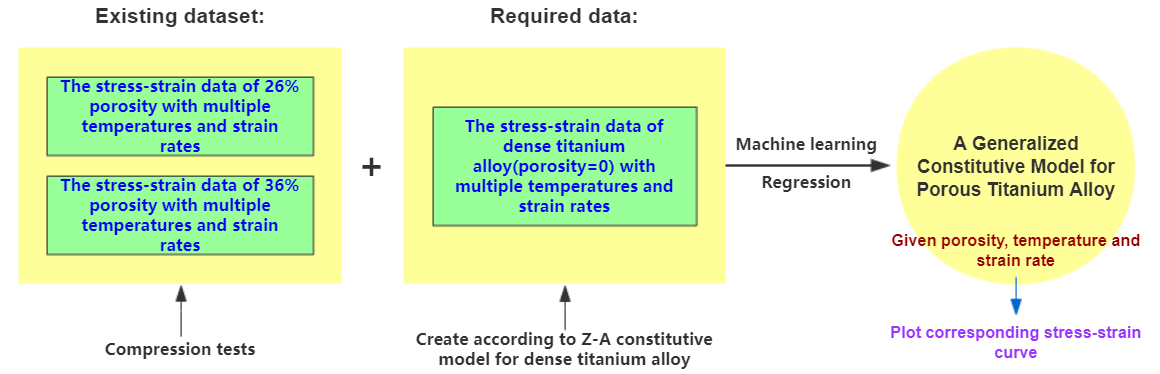

## 2. Data Source

As the figure above shows, the data include two parts. 

The first part was obtained from a research topic, 'Study on Meso Scale Cutting Mechanism and Microstructure Integrity of Porous Titanium Alloy for Bone Implant Materials', which was supported by the National Natural Science Foundation of China(No.51305174). Based on the data, a related paper, The first part was obtained from a research topic, 'Study on Meso Scale Cutting Mechanism and Microstructure Integrity of Porous Titanium Alloy for Bone Implant Materials', which was supported by the National Natural Science Foundation of China(No.51305174). Based on the data, a related paper, [Study on the Tribological Properties of Porous Titanium Sliding against Tungsten Carbide YG6](https://pdfs.semanticscholar.org/50d9/fcaafec263b4e93ceb3a13ddb61166887368.pdf) is published, which describes the constitutive relationship of two types of porous titanium alloy with 26% and 36% porosities. The specific chemical composition and mechanical parameters can be found in the paper. 

However, the experiments for the constitutive relationship of dense titanium alloy were not performed. Therefore, the second part of data should be created, which describes the stress-strain relationship of dense titanium alloy(porosity = 0). By literature research, [Research on Mechanical Properties Test and Dynamic Material Model of Ti6Al4V Titanium Alloy](http://cdmd.cnki.com.cn/Article/CDMD-10287-1013024078.htm) fits the Z-A constitutive model for dense titanium alloy. The chemical composition of Ti6Al4V is very close to the porous titanium alloy we use. Hence, the stress-strain relationship of dense titanium alloy with various temperatures and strain rates can be created according such Z-A constitutive model.

The first part of data is in the file <mark>data.csv</mark>, and the code for creating the second part of data is in <mark>create_data.py</mark>, which will be shown in section 3.            

## 3. Supplement to Data

The Z-A constitutive model can be described as:


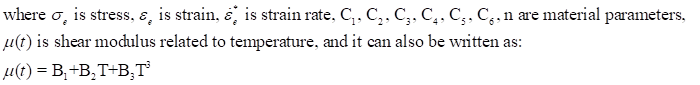
The parameters for fitting the Z-A constitutive model are determined in the above article:

| C1 | C2 | C3 | C4 | C5 | C6 | n |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| 167.4473 | 212.567 | 0.0238 | 0.0029 | 6505.6 | 1005.2 | 1.1435 |

Because the above formula only describes the compression process after yield stage, the process before yield limit should be added, which presents a proportional relation between stress and strain (Hooke's law). The yield stress with different loading conditions can be determined by the following table:

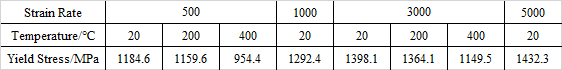

The variables are in the constitutive model are stress, strain, temperature and strain rate. It is clear to determine temperature and strain rate first, and generate stress-strain curves. The code to create the second part of data is in <mark>create_data.py</mark>, and now we can run it.

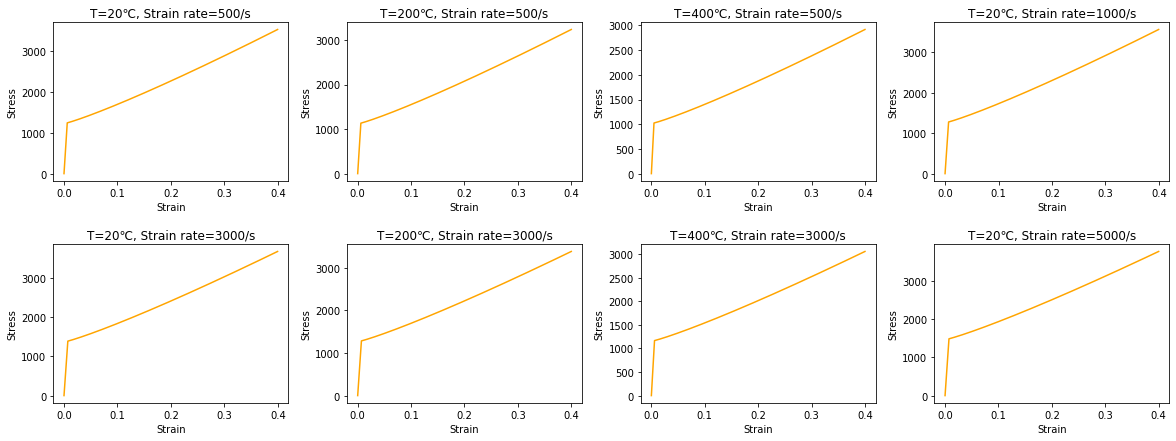

In [2]:
import os
os.chdir('G:\\data') # change the current working directory
%run create_data.py # run the code to create the second part of the data

By now, eight groups of supplementary data are created and combined. The data are saved in the variable <span style="background-color:#E0E0E0">data_supplement</span>.

## 4. Description of Data

In [3]:
print(data_supplement.tail())

           stress    strain     T  strainrate  porosity
6403  3762.048350  0.397841  20.0      5000.0       0.0
6404  3765.352337  0.398341  20.0      5000.0       0.0
6405  3768.656918  0.398841  20.0      5000.0       0.0
6406  3771.962094  0.399341  20.0      5000.0       0.0
6407  3775.267864  0.399841  20.0      5000.0       0.0


The presented data illustrate the structure of the dataset. There are totally five labels: stress, strain, temperature, strain rate, and porosity. 

######  -stress
Stress shows the magnitude of the force during the compression process. The relationship between stress and compression force is: 

    stress = force / A
    where A means the sectional area of the titanium alloy  
    
######  -strain
Strain reflects the deformation extent. The relationshop between the strain and the length of the workpiece is:

    strain = ΔL / L
    where ΔL means the length decrement by compression, and L means the original length
    
######  -T  
T means the environment temperature while performing the compression text. It can be regarded as a constant, in degrees Celsius.

######  -strain rate
Strain rate is the change in strain (deformation) of a material with respect to time. It describes how fast the deformation is going. The expression in math is:

    strain rate = d((L(t)-L0)/L0) / dt = v(t)/L0
    where v(t) is the speed at which the ends are moving away from each other
    
######  -porosity
Porosity is a measure of the void spaces in titanium alloy, i.e. a fraction of the volume of voids over the total volume, between 0 and 100%.

## 5. Data Organizing

Now the second part of data (supplementary data) is created, and it should be combined with the first part of data, which is in the file <font color='grey'>data.csv</font>.

In [4]:
data_origin = pd.read_csv('data.csv')
print(data_origin.tail())

           stress    strain   T  strainrate  porosity
22481  650.539665  0.274819  25        2300        26
22482  650.277810  0.275221  25        2300        26
22483  648.615309  0.275422  25        2300        26
22484  650.272783  0.275821  25        2300        26
22485  649.629803  0.276218  25        2300        26


In [5]:
# combine two parts of data
data_completion = pd.concat([data_supplement,data_origin], ignore_index=True)
print(data_completion.tail())

           stress    strain     T  strainrate  porosity
28889  650.539665  0.274819  25.0      2300.0      26.0
28890  650.277810  0.275221  25.0      2300.0      26.0
28891  648.615309  0.275422  25.0      2300.0      26.0
28892  650.272783  0.275821  25.0      2300.0      26.0
28893  649.629803  0.276218  25.0      2300.0      26.0


The variable <span style="background-color:#F0F0F0">data_completion</span> stores the complete dataset which has five colums and 28985 samples. The code for organizing data is in <mark>organize_data.py</mark>.

## 6. Exploratory Data Analysis

[]

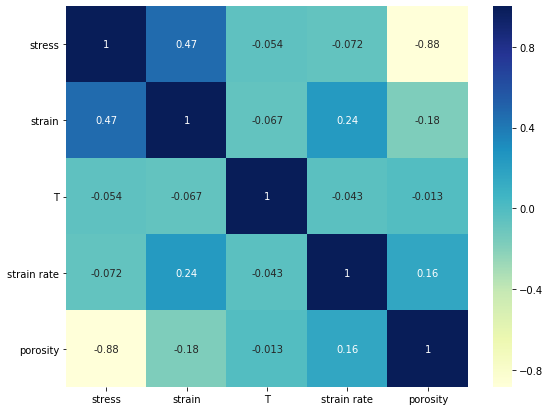

In [6]:
import seaborn as sns
# calculate the covariance coefficients of the features
corref = np.corrcoef(data_completion.values.T)
df_corref = pd.DataFrame(corref, columns = ['stress', 'strain', 'T', 'strain rate', 'porosity'],
                                   index = ['stress', 'strain', 'T', 'strain rate', 'porosity'])
# plot the covariance coefficients by heatmap
plt.figure(figsize = (9,7))
sns.heatmap(df_corref, annot=True, cmap='YlGnBu')
plt.yticks(rotation=0)
plt.plot()

As the figure shows, the features reflect obvious nonlinear relationships. However, there are two exceptions: stress-porosity and stress-strain. 

The covariance coefficient between stress and strain is 0.47, which means the stress rises with the increase of strain. By the plots in section 3, it's clear before the yield limit, the stress increases proportionally with strain, and after the yield, the relationship between stress and strain is nonlinear. 

The covariance coefficient between stress and porosity is -0.88, which shows a strong linear relationship. A simple conclusion is revealed that porosity influences the compression resisitance of the titanium alloy, and high porosity titanium alloy has poorer compression resisitance.

The code for Exploratory Data Analysis is in <mark>EDA.py</mark>.

## 7. An Attempt to Generalize the Constitutive Model

The generalization for constitutive model can be transferred into a regression problem in machine learning because we expect a set of stress values as the output, by giving a group of continuous strain values, including the specified temperature, strain rate, and porosity.

There are several useful and convenient regression  by algorithms, such as linear regression, random forests, decision tree regression, K-nearest neighbors (KNN), and support vector regression (SVR). Considering the nonlinearity between the features and the target and the amount of data samples, we use SVR preferentially.

Compared to linear and polynomial kernels, the radial basis function (RBF) kernel is more suitable to deal with nonlinear regression. Hence, we will choose SVR using RBF kernel to generalize this constitutive model.

### 7.1 Data Preprocessing (Scale Feature Values & Shuffle and Split Data)

As the output shows above, these four features differ significantly in value magnitude. For example, the range of strain is from 0 to 0.5098, whereas the range of strain rate is from 500 to 5200. If we input these samples for training directly, the contours of the cost function will be prolate rather than round, and the process of gradient descent will not only be tortuous but also time-consuming.

Therefore, the feature values need to remove the mean and scale to unit variance.

In [278]:
from sklearn.preprocessing import StandardScaler
X = data_completion.loc[ : ,'strain':]
Y = data_completion.loc[ : , 'stress']
Y = pd.DataFrame(Y)
sc_X = StandardScaler().fit(X)
sc_Y = StandardScaler().fit(Y)
X = sc_X.transform(X)
Y = sc_Y.transform(Y)
print('The feature values after scaling:')
print(X)
print('The target values after scaling:')
print(Y)

The feature values after scaling:
[[-1.2921348  -1.15813773 -1.52238074 -1.76974259]
 [-1.28786917 -1.15813773 -1.52238074 -1.76974259]
 [-1.28360353 -1.15813773 -1.52238074 -1.76974259]
 ...
 [ 1.05756264 -1.11648986 -0.11249068  0.18250009]
 [ 1.06097153 -1.11648986 -0.11249068  0.18250009]
 [ 1.06435822 -1.11648986 -0.11249068  0.18250009]]
The target values after scaling:
[[-0.90539988]
 [-0.78576907]
 [-0.66613826]
 ...
 [-0.14845767]
 [-0.14652338]
 [-0.14727374]]


Now, we have finished the standar scaling for the feature values.

In [280]:
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print('Train_features:')
print(X_train)
Y_train = np.array(Y_train).ravel()
print('Train_target:')
print(Y_train)

Train_features:
[[-0.07935153  0.34118563 -0.38663597  0.18250009]
 [-0.38526605 -0.49177179  0.7491088   0.93336266]
 [-0.12581627  1.17414306  1.61070829  0.93336266]
 ...
 [-1.04094319  0.34118563 -1.52238074 -1.76974259]
 [-0.70081959  1.17414306 -1.05241739  0.18250009]
 [ 0.53943884 -0.49177179  0.7491088   0.93336266]]
Train_target:
[-0.44691848 -0.58882242 -0.56561325 ...  0.52207009 -0.33247567
 -0.45025277]


The data is splited into four parts: X_train, X_test, Y_train, Y_test, and the order is shuffled.

### 7.2 Create Support Vector Regressor

In [281]:
from sklearn.svm import SVR
reg_rbf = SVR(C=1050, kernel='rbf', gamma=4e-3, epsilon = 0.07)

The most important SVR parameter is kernel type. For nonlinear regression, it is popular to select polynomial or gaussian. Here, he select RBF kernel, which is a kind of gaussian-type kernels. The other parameters are tentatively determined as following: <span style="background-color:#E0E0E0">gamma</span> = 4e-3, <span style="background-color:#E0E0E0">epsilon</span> = 0.07, and they can be adjusted according to the test results.

### 7.3 Train/Test Split for Regression

In [282]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
reg_rbf.fit(X_train, Y_train)
Y_pred = reg_rbf.predict(X_test)
Y_pred = sc_Y.inverse_transform(Y_pred.reshape(-1, 1))
# output R2 score
print("R^2: {}".format(reg_rbf.score(X_test, Y_test)))
# output root mean squared error
rmse = np.sqrt(mean_squared_error(sc_Y.inverse_transform(Y_test), Y_pred))
print("Root Mean Squared Error: {}".format(rmse))
mae = mean_absolute_error(sc_Y.inverse_transform(Y_test), Y_pred)
print("Mean Absolute Error: {}".format(mae))

R^2: 0.9911893022042685
Root Mean Squared Error: 79.7868956403183
Mean Absolute Error: 57.21476171490674


According to the root mean squared error, we can preliminarily suppose that this model by MVR using RBF kernel is not good. In the high porosity circumstance, the pores will collapse around 500 MPa, that means during the compression process, the highest stress is around 500 MPa. Therefore, a root mean squared error which is larger than 79 MPa is unaccepted.

There are a number of potential reasons which lead to the bad imitative effect, such as under fitting/over fitting and the inapplicability of SVR to this dataset. We can use cross validation to eliminate under fitting/over fitting. 

### 7.4 Cross Validation & Parameters Adjustment

In [284]:
# Try different values for C from 800 to 1200, the interval is 50
c_range = np.arange(800,1200,50)
c_scores = []
for c in c_range:
    reg = SVR(C=c, kernel='rbf', gamma=4e-3, epsilon = 0.07)
    score = cross_val_score(reg,X_train,Y_train, cv=5, scoring='neg_mean_squared_error')
    score = sc_Y.inverse_transform(-score)
    score = np.sqrt(score)
    c_scores.append(score.mean())
print(c_scores)

[27.993575181697025, 27.993275224507965, 27.99301092386428, 27.992710899780594, 27.99238168938565, 27.992096675368703, 27.991849814249417, 27.991614771488326]


By cross validation and parameter (C) adjustment, we get some means of the root squared errors. All of them are around 30 MPa, and they are still unacceptable. Because these results come out by cross validation, we can exclude under fitting and over fitting in the model. 

For such a kind of dataset, SVR may not be a suitable method. We need to use an alternative machien learning algorithm to express this dataset.

The code for SVR is in <mark>SVR.py</mark>.

## 8. A More Effective Way to Generalize the Constitutive Model

Before taking an alternative way to generalize the constitutive model, we need analyze the data first. This is a multiple-features dataset. Although EDA does not reflect any strong linear characteristic, some features have local or segmented linear characteristics with the target in the dataset. For instance, the relationship between stress and strain has segmented linearity. For the other features, temperature, strain rate and porosity, they are not continuous, and concentrate on several values. Such features may not suitable for scaling, and we may choose a machine learning algorithm which does not need feature scaling.

Decision Tree Regression (DTR) is a wonderful candidate to deal with this dataset cause it can split the data and express each part. Therefore, the local and segmented linearity of the data may be interpretated well by DTR. In addition, it is unnecessary for DTR to scale the features.

In this section, we will try to use DTR with AdaBoost(ABR) to generalize the constitutive model.

### 8.1 Data Reprocessing

In [298]:
from sklearn.model_selection import train_test_split
# create feature data and target data without scaling
X = data_completion.loc[ : ,'strain':]
Y = data_completion.loc[ : , 'stress']
X = np.array(X)
Y = np.array(Y).ravel()
# Shuffle and split the data into training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print('Train_features:')
print(X_train)
Y_train = np.array(Y_train).ravel()
print('Train_target:')
print(Y_train)

Train_features:
[[1.42157323e-01 2.00000000e+02 1.95000000e+03 2.60000000e+01]
 [1.06299318e-01 1.00000000e+02 3.40000000e+03 3.60000000e+01]
 [1.36710923e-01 3.00000000e+02 4.50000000e+03 3.60000000e+01]
 ...
 [2.94436187e-02 2.00000000e+02 5.00000000e+02 0.00000000e+00]
 [6.93114670e-02 3.00000000e+02 1.10000000e+03 2.60000000e+01]
 [2.14689312e-01 1.00000000e+02 3.40000000e+03 3.60000000e+01]]
Train_target:
[ 392.8675823   271.2716845   291.1593644  ... 1223.18304763  490.9323473
  390.0104661 ]


Now we get the new features and target data without scaling.

### 8.2 Training and Testing

In [235]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
reg_tree = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=50, learning_rate=1)
reg_tree.fit(X_train, Y_train)
Y_pred = reg_tree.predict(X_test)
# calculate the training and testing scores
print("R^2: {}".format(reg_tree.score(X_test, Y_test)))
mae = np.sqrt(mean_absolute_error(Y_test, Y_pred))
print("Mean Absolute Error: {}".format(mae))

R^2: 0.9998595676842066
Mean Absolute Error: 2.8092266675144417


With the default parameters, the score is very close to 1, and the MAE is 2.81, which is much less than the MAE by SVR. It is clear that DTR can produce better performance than SVR while dealing with this dataset. 

We should continue to optimize the parameters in the model to improve prediction accuracy.

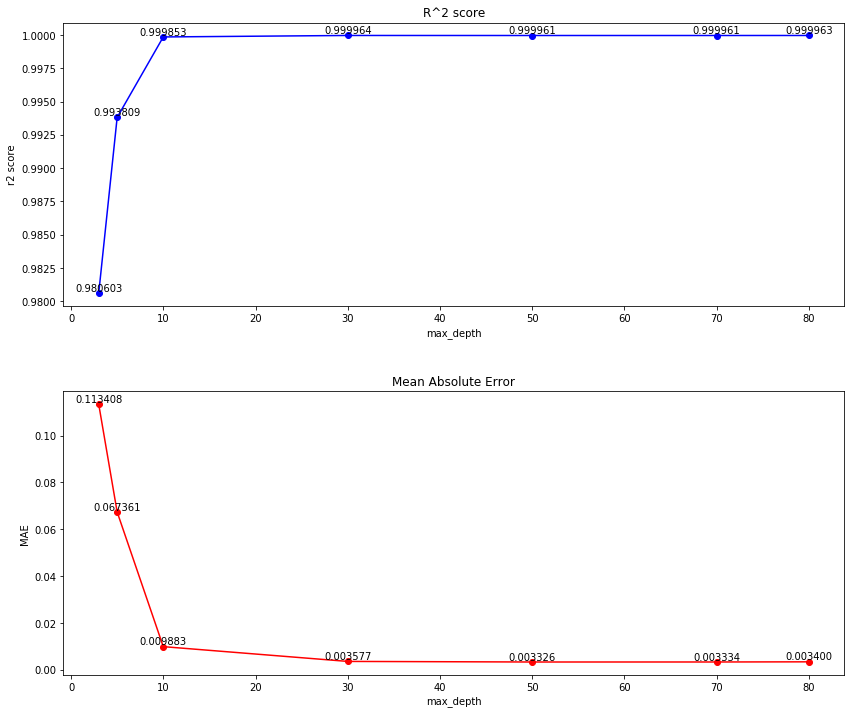

In [285]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
# create 10 groups of cross-validation sets 
cro_val = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# set figure size
train_fig = plt.figure(figsize=(14,12))
# train&test models with different max_depth, n_estimators and learning_rate take default values
perf_scores = []
perf_maes = []
depth = [3,5,10,30,50,70,80]
for x in depth:
    reg_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=x), n_estimators=50, learning_rate=1)
    # calculate the training and testing scores
    perf_score = cross_val_score(reg_2,X_train,Y_train, cv=10, scoring='r2')              
    perf_mae = cross_val_score(reg_2,X_train,Y_train, cv=10, scoring='neg_mean_absolute_error')
    perf_scores.append(perf_score.mean())
    perf_maes.append(-perf_mae.mean())   
# subplot the learning curves 
perf_r1 = train_fig.add_subplot(2, 1, 1)
perf_r1.plot(depth, perf_scores, marker='o', color = 'blue')
plt.xlabel('max_depth')
plt.ylabel('r2 score')
for a, b in zip(depth, perf_scores):
    plt.text(a, b, '%.6f'%b, ha='center', va='bottom', fontsize=10)
plt.title('R^2 score')
perf_r2 = train_fig.add_subplot(2, 1, 2)
perf_r2.plot(depth, perf_maes, marker='o', color = 'red')
plt.xlabel('max_depth')
plt.ylabel('MAE')
for a, b in zip(depth, perf_maes):
    plt.text(a, b, '%.6f'%b, ha='center', va='bottom', fontsize=10)
plt.title('Mean Absolute Error')
plt.subplots_adjust(hspace=0.3)
plt.show()

As the figure shows, while <span style="background-color:#E0E0E0">max_depth</span> is larger than 10, the r^2 score tend to convergent to 1. While <span style="background-color:#E0E0E0">max_depth</span> is larger than 30, the MAE tend to convergent to 3. When <span style="background-color:#E0E0E0">max_depth</span> is around 50, we can get a hightest r^2 score and a smallest MAE. That means the optimal <span style="background-color:#E0E0E0">max_depth</span> for this model is near 50. 

### 8.3 Grid Research  to Fine-tune the Parameters

We have squeeze the <span style="background-color:#E0E0E0">max_depth</span> into a small range near 50. Now we should find out the optimal <span style="background-color:#E0E0E0">max_depth</span>, with adjusting <span style="background-color:#E0E0E0">n_estimators</span> and <span style="background-color:#E0E0E0">learning_rate</span> simultaneously.

In [246]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')
depth_space = np.linspace(45, 55, 11)
opt = GridSearchCV(DecisionTreeRegressor(), {'max_depth': depth_space})
opt.fit(X_train, Y_train)
print("Tuned DTR Parameters: {}".format(opt.best_params_)) 

Tuned DTR Parameters: {'max_depth': 53.0}


Now we get the best parameter for <span style="background-color:#E0E0E0">max_depth</span> is 53, and we continue to find the best <span style="background-color:#E0E0E0">n_estimators</span> and <span style="background-color:#E0E0E0">learning_rate</span>.

In [289]:
n_estimators_space = np.linspace(20, 60, 41).astype(int)
learning_rate_space = np.linspace(0.1, 1, 19)
opt_2 = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth=53)), param_grid={"n_estimators": n_estimators_space, 
                                                                                        "learning_rate": learning_rate_space})
opt_2.fit(X_train, Y_train)
print("Tuned ABR Parameters: {}".format(opt_2.best_params_))

Tuned ABR Parameters: {'learning_rate': 0.2, 'n_estimators': 54}


By grid research, the best <span style="background-color:#E0E0E0">n_estimators</span> and <span style="background-color:#E0E0E0">learning_rate</span> can be determined. The best <span style="background-color:#E0E0E0">n_estimators</span> is 0.2, and the best <span style="background-color:#E0E0E0">learning_rate</span> is 54.

### 8.4 Testing the model with the original data

In this section, we will reconstruct the learning model with the optimal parameters, test the performance by a set of original data, and then show its performance.

In [487]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 40)
reg_opt = AdaBoostRegressor(DecisionTreeRegressor(max_depth=53), n_estimators=54, learning_rate=0.2)
reg_opt.fit(X_train, Y_train)
Y_pred = reg_tree.predict(X_test)
# calculate the training and testing scores
print("R^2: {}".format(reg_tree.score(X_test, Y_test)))
mae = np.sqrt(mean_absolute_error(Y_test, Y_pred))
print("Mean Absolute Error: {}".format(mae))

R^2: 0.9998632963544839
Mean Absolute Error: 2.7933254614762553


According to the r^2 score and MAE, we can see that the performance of the model after tuning the parameters is robust. Next we will use a set of original data to test, the conditions are: T = 25℃, strain rate is 2300/s, porosity is 26%.

In [482]:
# construct the final model
reg_final = AdaBoostRegressor(DecisionTreeRegressor(max_depth=53), n_estimators=54, learning_rate=0.2)
reg_final.fit(X, Y)
final_test_targer = data_completion.iloc[28168:,0]
final_test_targer = np.array(final_test_targer).ravel()
final_test_features = data_completion.iloc[28168:,1:]
final_test_features = np.array(final_test_features)
final_pred = reg_final.predict(final_test_features)
# calculate accuracy
ite = list(final_test_targer)
ind_n = 0
err = 0
err_perc = 0
for val in ite:
    err += math.fabs(val - final_pred[ind_n])
    if val > 0:
        err_perc += math.fabs(val - final_pred[ind_n]) / val
    if val < 0:
        err_perc += math.fabs(val - final_pred[ind_n]) / (-val)
    if val == 0:
        continue   
    ind_n += 1
err /=  ind_n
err_perc = 100*err_perc/ind_n
print("The Mean Absolute Error: {}".format(err))
print("The Mean Absolute Error Percentage: {}%".format("%.2f" % err_perc))

The Mean Absolute Error: 1.3388223705772462
The Mean Absolute Error Percentage: 1.42%


Compared to a set of the original data, the mean absolute error is 1.3 MPa, and the mean absolute error percentage is 1.42%. That means the accuracy of the model can reach 98.6%. Next, we can visualize the result and the error.

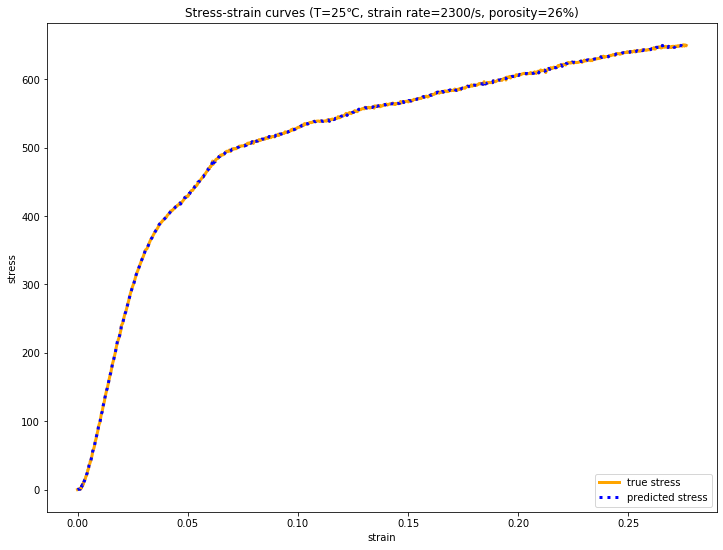

In [382]:
final_test_strain = data_completion.iloc[28168:,1]
final_test_strain = np.array(final_test_strain)
final_fig = plt.figure(figsize=(12,9))
final_plot = final_fig.add_subplot(1, 1, 1)
plt.plot(final_test_strain, final_test_targer, lw=3, color='orange', label='true stress')
plt.plot(final_test_strain, final_pred, lw=3, color='blue',  linestyle=':', label='predicted stress')
plt.title('Stress-strain curves (T=25℃, strain rate=2300/s, porosity=26%)')
plt.xlabel('strain')
plt.ylabel('stress')
plt.legend(loc='lower right') 
plt.show()

### 8.5 Prediction of One-dimensional Constitutive Model

In order to test the generalization ability of the model, we limit the strain rate and porosity and make the temperature varied:

Gtoup 1: strain rate = 2380, porosity = 27.5%, varied temperatures


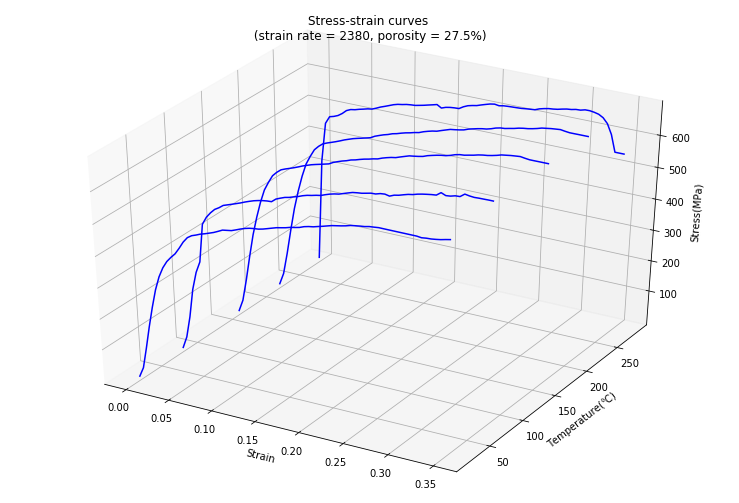

In [469]:
from mpl_toolkits.mplot3d import axes3d
# create feature values
reg_finalv1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=53, min_samples_leaf=4), n_estimators=54, learning_rate=0.2)
reg_finalv1.fit(X, Y)
strain_g1 = []
strain_g1 = np.arange(0, 0.354, 0.005)
strainrate_g1 = []
porosity_g1 = []
T_g1_1 = []
T_g1_2 = []
T_g1_3 = []
T_g1_4 = []
T_g1_5 = []
# create feature values
for temp_g1 in strain_g1:
    strainrate_g1.append(2380)  
    porosity_g1.append(27.5)
    T_g1_1.append(20)
    T_g1_2.append(80)
    T_g1_3.append(160)
    T_g1_4.append(220) 
    T_g1_5.append(280) 
g1_1 = pd.DataFrame({'test_strain':strain_g1, 'test_T':T_g1_1, 'test_strainrate':strainrate_g1, 'test_porosity':porosity_g1})
g1_2 = pd.DataFrame({'test_strain':strain_g1, 'test_T':T_g1_2, 'test_strainrate':strainrate_g1, 'test_porosity':porosity_g1})
g1_3 = pd.DataFrame({'test_strain':strain_g1, 'test_T':T_g1_3, 'test_strainrate':strainrate_g1, 'test_porosity':porosity_g1})
g1_4 = pd.DataFrame({'test_strain':strain_g1, 'test_T':T_g1_4, 'test_strainrate':strainrate_g1, 'test_porosity':porosity_g1})
g1_5 = pd.DataFrame({'test_strain':strain_g1, 'test_T':T_g1_5, 'test_strainrate':strainrate_g1, 'test_porosity':porosity_g1})
pred_g1_1 = reg_finalv1.predict(g1_1)
pred_g1_2 = reg_finalv1.predict(g1_2)
pred_g1_3 = reg_finalv1.predict(g1_3)
pred_g1_4 = reg_finalv1.predict(g1_4)
pred_g1_5 = reg_finalv1.predict(g1_5)
# set plot for prediction
fig_pred1 = plt.figure(figsize=(13,9))
ax_pre1 = fig_pred1.gca(projection='3d')
ax_pre1.plot(strain_g1, pred_g1_1, zs=20, zdir='y', color = 'b')
ax_pre1.plot(strain_g1, pred_g1_2, zs=80, zdir='y', color = 'b')
ax_pre1.plot(strain_g1, pred_g1_3, zs=160, zdir='y', color = 'b')
ax_pre1.plot(strain_g1, pred_g1_4, zs=220, zdir='y', color = 'b')
ax_pre1.plot(strain_g1, pred_g1_5, zs=280, zdir='y', color = 'b')
ax_pre1.set_xlabel('Strain')
ax_pre1.set_ylabel('Temperature(℃)')
ax_pre1.set_zlabel('Stress(MPa)')
ax_pre1.set_title("Stress-strain curves \n (strain rate = 2380, porosity = 27.5%) ")
ax_pre1.view_init(elev=35., azim=-60)
plt.show()

The 3D figure presents the stress-strain curves along the temperature dimension with 2380/s strain rate and 27.5% porosity.

The predicted shapes of the curves are reasonable since they have these important characteristics:

1. It is easy to find the yield limit on each curve. Before the yield limit, the curves grow proportional. After the yield limit, the curves rise slowly.

2. When the strains reach 0.3, the curves start to decline, that presents the pore-collapse phenomenon of the porous titanium alloy.

3. With the increase of temperature, the slope of "proportional stage" becomes larger.

Now, we change the varied dimension from temperature to porosity:

Group 2: temperature = 120℃, strain rate = 550, varied porosity

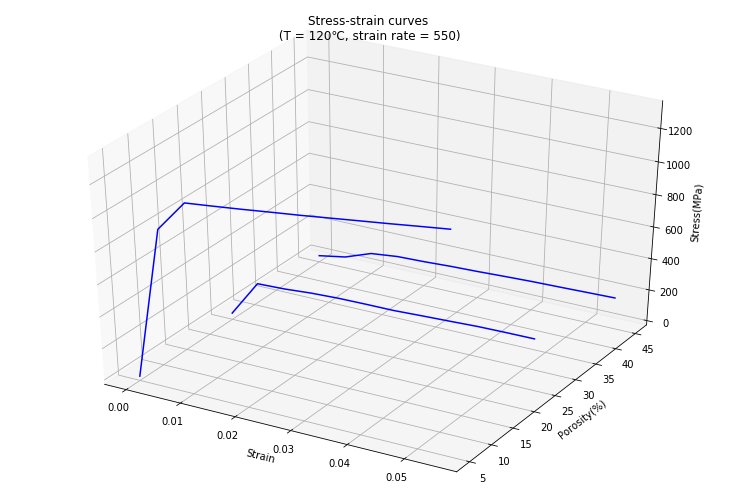

In [474]:
# create feature values
reg_finalv = AdaBoostRegressor(DecisionTreeRegressor(max_depth=53, min_samples_leaf=2), n_estimators=54, learning_rate=0.2)
reg_finalv.fit(X, Y)
strain_g3 =[]
strain_g3 = np.arange(0, 0.06, 0.005)
T_g3 = []
strainrate_g3 = []
porosity_g3_1 = []
porosity_g3_2 = []
porosity_g3_3 = []
# create feature values
for temp_g1 in strain_g3:
    T_g3.append(120)  
    strainrate_g3.append(550)
    porosity_g3_1.append(5)
    porosity_g3_2.append(25)
    porosity_g3_3.append(45)
g3_1 = pd.DataFrame({'test_strain':strain_g3, 'test_T':T_g3, 'test_strainrate':strainrate_g3, 'test_porosity':porosity_g3_1})
g3_2 = pd.DataFrame({'test_strain':strain_g3, 'test_T':T_g3, 'test_strainrate':strainrate_g3, 'test_porosity':porosity_g3_2})
g3_3 = pd.DataFrame({'test_strain':strain_g3, 'test_T':T_g3, 'test_strainrate':strainrate_g3, 'test_porosity':porosity_g3_3})
pred_g3_1 = reg_finalv.predict(g3_1)
pred_g3_2 = reg_finalv.predict(g3_2)
pred_g3_3 = reg_finalv.predict(g3_3)
# set plot for prediction
fig_pred1 = plt.figure(figsize=(13,9))
ax_pre1 = fig_pred1.gca(projection='3d')
ax_pre1.plot(strain_g3, pred_g3_1, zs=5, zdir='y', color = 'b')
ax_pre1.plot(strain_g3, pred_g3_2, zs=25, zdir='y', color = 'b')
ax_pre1.plot(strain_g3, pred_g3_3, zs=45, zdir='y', color = 'b')
ax_pre1.set_xlabel('Strain')
ax_pre1.set_ylabel('Porosity(%)')
ax_pre1.set_zlabel('Stress(MPa)')
ax_pre1.set_title("Stress-strain curves \n (T = 120℃, strain rate = 550) ")
ax_pre1.view_init(elev=35., azim=-60)
plt.show()

The 3D figure indicates that the titanium alloy with larger porosity has weaker compression resistance, that is in agreement to the law from the experiments.

Now, we change the varied dimension from porosity to strain rate:

Group 3: temperature = 315℃, porosity = 25.5%, varied strain rate

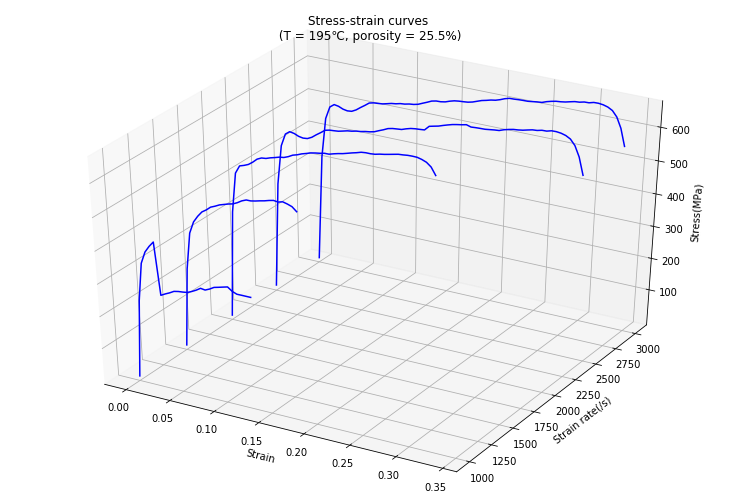

In [471]:
# create feature values
reg_finalv2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=53, min_samples_leaf=2), n_estimators=54, learning_rate=0.2)
reg_finalv2.fit(X, Y)
strain_g2_1 = np.arange(0, 0.135, 0.005)
strain_g2_3 = np.arange(0, 0.235, 0.005)
strain_g2_4 = np.arange(0, 0.345, 0.005)
T_g2_1 = []
T_g2_3 = []
T_g2_4 = []
porosity_g2_1 = []
porosity_g2_3 = []
porosity_g2_4 = []
strainrate_g2_1 = []
strainrate_g2_2 = []
strainrate_g2_3 = []
strainrate_g2_4 = []
strainrate_g2_5 = []
# create feature values
for temp_g1 in strain_g2_1:
    T_g2_1.append(315)  
    porosity_g2_1.append(25.5)
    strainrate_g2_1.append(1000)
    strainrate_g2_2.append(1500)
for temp_g1 in strain_g2_3:
    T_g2_3.append(315)  
    porosity_g2_3.append(25.5)
    strainrate_g2_3.append(2000)
for temp_g1 in strain_g2_4:
    T_g2_4.append(315)  
    porosity_g2_4.append(25.5)
    strainrate_g2_4.append(2500) 
    strainrate_g2_5.append(3000) 
g2_1 = pd.DataFrame({'test_strain':strain_g2_1, 'test_T':T_g2_1, 'test_strainrate':strainrate_g2_1, 'test_porosity':porosity_g2_1})
g2_2 = pd.DataFrame({'test_strain':strain_g2_1, 'test_T':T_g2_1, 'test_strainrate':strainrate_g2_2, 'test_porosity':porosity_g2_1})
g2_3 = pd.DataFrame({'test_strain':strain_g2_3, 'test_T':T_g2_3, 'test_strainrate':strainrate_g2_3, 'test_porosity':porosity_g2_3})
g2_4 = pd.DataFrame({'test_strain':strain_g2_4, 'test_T':T_g2_4, 'test_strainrate':strainrate_g2_4, 'test_porosity':porosity_g2_4})
g2_5 = pd.DataFrame({'test_strain':strain_g2_4, 'test_T':T_g2_4, 'test_strainrate':strainrate_g2_5, 'test_porosity':porosity_g2_4})
pred_g2_1 = reg_finalv2.predict(g2_1)
pred_g2_2 = reg_finalv2.predict(g2_2)
pred_g2_3 = reg_finalv2.predict(g2_3)
pred_g2_4 = reg_finalv2.predict(g2_4)
pred_g2_5 = reg_finalv2.predict(g2_5)
# set plot for prediction
fig_pred1 = plt.figure(figsize=(13,9))
ax_pre1 = fig_pred1.gca(projection='3d')
ax_pre1.plot(strain_g2_1, pred_g2_1, zs=1000, zdir='y', color = 'b')
ax_pre1.plot(strain_g2_1, pred_g2_2, zs=1500, zdir='y', color = 'b')
ax_pre1.plot(strain_g2_3, pred_g2_3, zs=2000, zdir='y', color = 'b')
ax_pre1.plot(strain_g2_4, pred_g2_4, zs=2500, zdir='y', color = 'b')
ax_pre1.plot(strain_g2_4, pred_g2_5, zs=3000, zdir='y', color = 'b')
ax_pre1.set_xlabel('Strain')
ax_pre1.set_ylabel('Strain rate(/s)')
ax_pre1.set_zlabel('Stress(MPa)')
ax_pre1.set_title("Stress-strain curves \n (T = 195℃, porosity = 25.5%) ")
ax_pre1.view_init(elev=35., azim=-60)
plt.show()


From the 3D figure, we find that porous titanium alloy presents the better plasticity in the high strain rate compression because the pores collapse with a larger strain. This prediction conforms to the law from the compression test data, which proves the high accuracy of this constitutive model.

The code of this section is in <mark>RegressionTree.py</mark>

## 9. Conclusion

This project demonstrates the magic of data science. 

First of all, this project integrated the compression test data of porous titanium alloy with the "created" compression data of dense titanium alloy according to the constitutive formulas concluded in the published literature.

Based on the integrated dataset, I tried some machine learning algorithms to generalize the constitutive model for porous titanium alloy. Support vector regression did not show the good performance, and I finally chose AdaBoostRegressor with regression tree to generalize the constitutive model.

Then, I visualized the constitutive model by presenting the stress-strain curves along three different dimensions. The characteristics of the curves conformed to the expected.

## 10. Potential Improvement

### 10.1 The Improvement of the Prediction Model

A good model may not be built in one day, and it needs be upgraded continuously. Although Adaboost & tree regression show the high accuracy of data fitting and good performance for the prediction with the features out of the dataset. However, the generalizaion ability of tree regression depends on the data integrity. When the values of the features are far away that in the dataset, the preduction may distort.

To increase the generalization ability, R. Quinlan and Yong Wang invented the M5 algorithm, and later it was reconstructed to M5P for inducing trees of regression models. M5P algorithm combines a conventional decision tree with the possibility of linear regression functions at the nodes. The mechanism of the algorithm can be demonstrate by a picture:

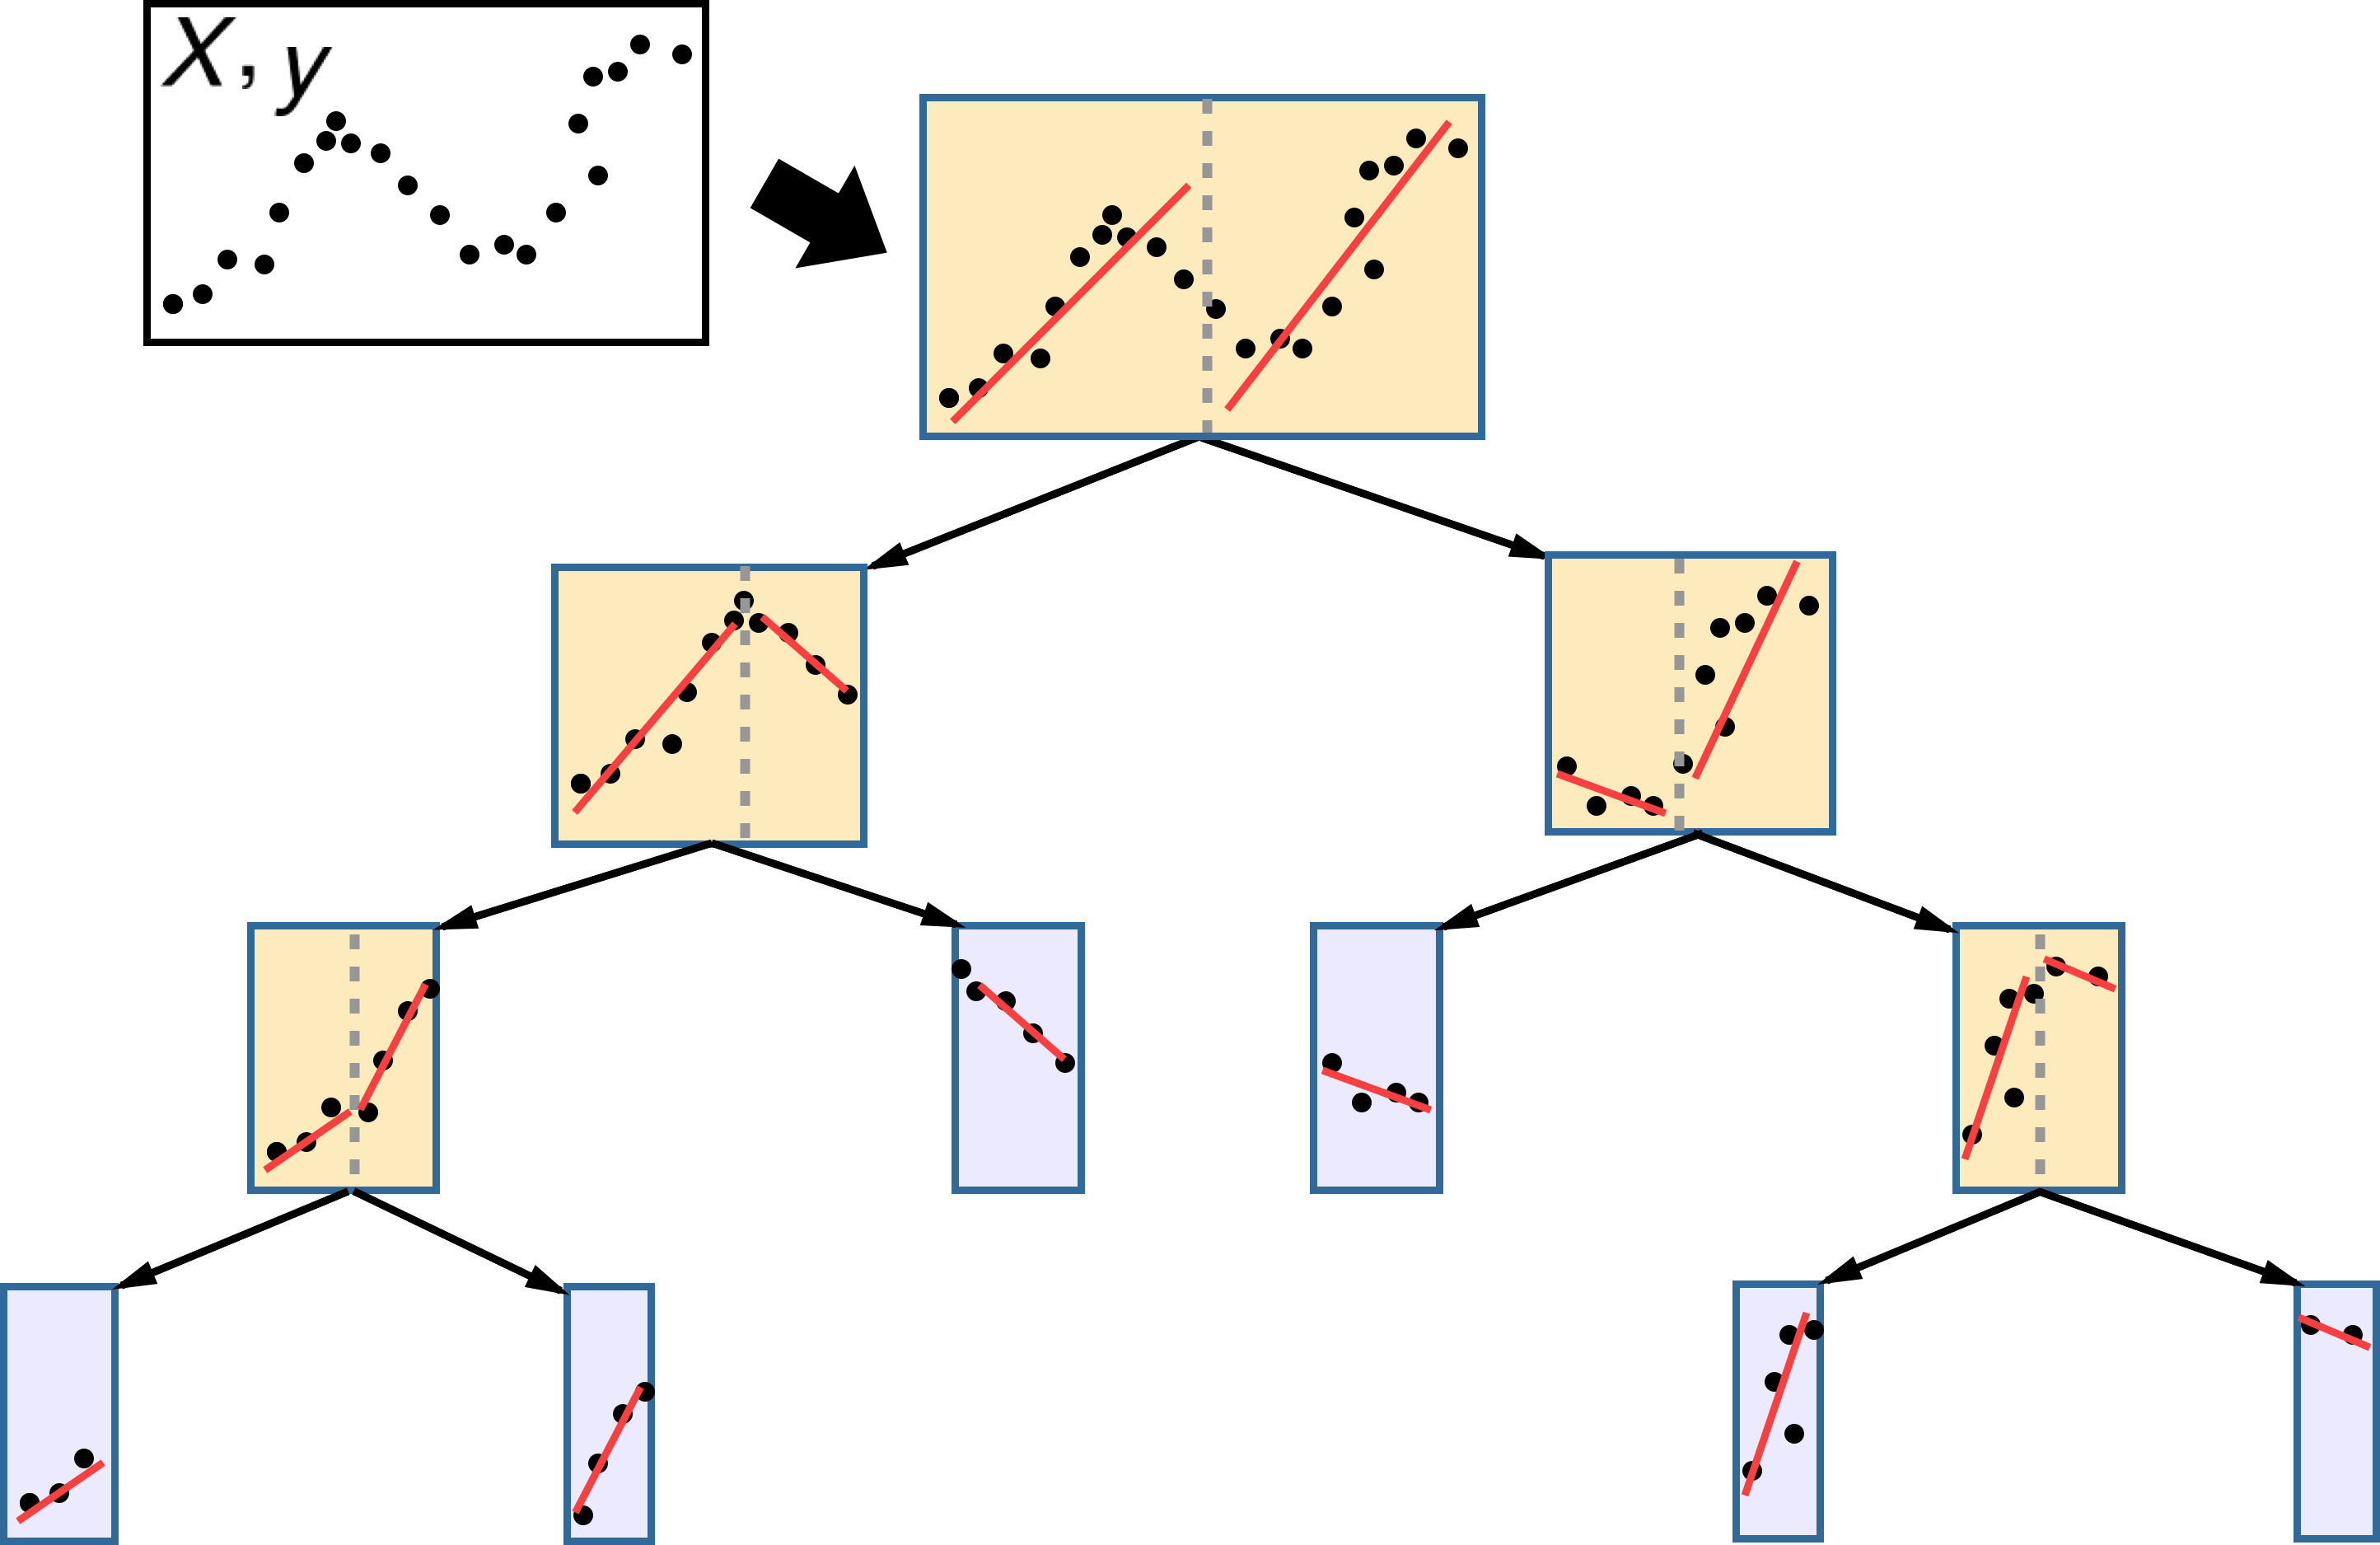

This picture is from "https://github.com/ankonzoid/LearningX/tree/master/advanced_ML/model_tree". We can see that M5P algorithm inserts linear regression into the nodes of decision tree. It is effective to deal with the data whose features have strong linear relationship with the target.

For this project, the features have non-linear relationship with the target. Therefore, it is not suitable to insert linear regression. Instead, it may be robust to insert the neural network into the nodes because neural network can deal with non-linear relationships well. There are some [open source](https://github.com/ankonzoid/LearningX/tree/master/advanced_ML/model_tree) about the model tree with different regression algorithms including neural network.

Because of the expensive calculation of neural network with model tree, this project does not use these complex algorithms. However, it may be a good method to improve this project.

### 10.2 GUI Implementation

This project concentrates on data organization and constructing the preduction model to generalize the constitutive model for porous titanium alloy. For users, it is convenient to look up the stress-strain curves in a GUI. Here is a sample of the GUI design.

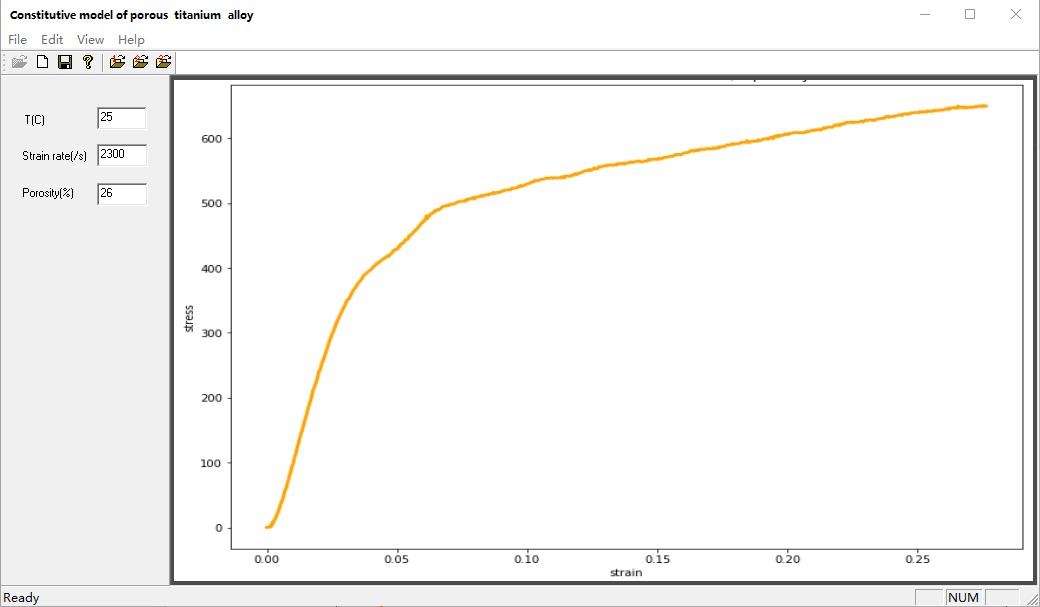